In [1]:
from IPython.html.widgets import interact, interactive, fixed
from IPython.html import widgets
%load_ext rmagic
%matplotlib inline
from base.classifiers import OnevsallClassifier
from base.classifiers import PairwiseClassifier
import numpy as np
from base import plotting
import base.classifiers.pairwise as pw
import base.classifiers.onevsall as oa
import base.classifiers
import glob
import pandas as pd
from ggplot import *
from base import tools
from scipy import stats
import itertools
import seaborn as sns
import mpld3
import matplotlib.pyplot as plt

In [2]:
from sklearn.linear_model import RidgeClassifier
from sklearn.cross_validation import cross_val_score
from sklearn.metrics import roc_auc_score
from sklearn.cross_validation import StratifiedKFold
from sklearn.metrics import make_scorer

In [3]:
clf = OnevsallClassifier.load("../results/ward_f30_Ridge_abs_topics60_filt/classifier.pkl")

In [4]:
scorer = make_scorer(roc_auc_score)
classifier = RidgeClassifier()

In [5]:
results = []
for reg in range(0, 30):
    X = clf.c_data[reg][0]
    y = clf.c_data[reg][1]
    fis = clf.feature_importances[reg]

    for i in range(1, 81):
        X_1 =  X[:, np.abs(fis).argsort()[::-1][0:i]]
        results.append([cross_val_score(classifier, X_1, y, cv=4, scoring=scorer).mean(), i, reg])
results = pd.DataFrame(results, columns=['score', 'num_features', 'region'])

AttributeError: OnevsallContinuous instance has no attribute 'c_data'

In [26]:
fis = clf.feature_importances[20]
np.abs(fis).argsort()[::-1][5]


77

In [39]:
X = clf.c_data[20][0]
y = clf.c_data[20][1]

In [103]:
X_1 = X[:, np.abs(fis).argsort()[::-1][4:80]]

In [104]:

cross_val_score(classifier, X_1, y, cv=4, scoring=scorer).mean()

0.5879862549735293

In [10]:
%Rpush results

In [20]:
%%R
library(dplyr)
ms <- results %.%
    group_by(num_features) %.%
    summarise(score=mean(score))

(0.5242132 - 0.5) / (max(ms$score) - 0.5)



[1] 0.2550575


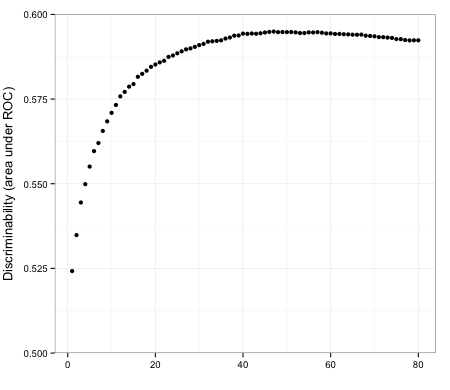

In [7]:
%%R -w 450 -h 390
library(ggplot2)
ggplot(results, aes(num_features, score)) + stat_summary(fun.y=mean, geom="point") + coord_cartesian(ylim=c(0.5, 0.6)) + theme_bw() + ylab("Discriminability (area under ROC)" ) + xlab("") + theme(axis.title.y = element_text(size = 13, vjust = 0.2))

In [8]:
(results.groupby('num_features').agg(np.mean).max())  - ((results.groupby('num_features').agg(np.mean).max() - 0.5) * .1)

score      0.585439
region    13.100000
dtype: float64

In [9]:
results.groupby('num_features').agg(np.mean) > 0.58439

,score,region
num_features,,
1,False,True
2,False,True
3,False,True
4,False,True
5,False,True
6,False,True
7,False,True
8,False,True
9,False,True


In [10]:
fis = pd.DataFrame(clf.feature_importances)
fis['region'] = range(0, 30)
fis_melt = pd.melt(fis, var_name='topic_order', value_name='importance', id_vars=['region'])

In [11]:
top_words = pd.read_csv("../data/unprocessed/abstract_topics_filtered/top_words_80-july.csv")
keys = pd.merge(pd.DataFrame(np.array([range(0, 80), clf.feature_names]).T, columns=['topic_order', 'topic_name']), top_words)
keys.topic_order = keys.topic_order.astype('int')

In [12]:
fis_melt

,region,topic_order,importance
0,0,0,-0.008468
1,1,0,-0.009724
2,2,0,-0.010405
3,3,0,-0.018569
4,4,0,-0.007704
5,5,0,-0.020413
6,6,0,-0.034828
7,7,0,0.011238
8,8,0,-0.011421
9,9,0,0.012088


In [13]:
fis_melt = pd.merge(fis_melt, keys)
fis_melt['abs_imp'] = np.abs(fis_melt['importance'])

In [14]:
fis_melt[fis_melt.groupby('region')['abs_imp'].rank(ascending=False) < 6].sort(['region', 'abs_imp'])

,region,topic_order,importance,topic_name,top_words,abs_imp
1440,0,48,0.073403,topic52,fear threat conditioning,0.073403
2280,0,76,-0.073927,topic78,standard individual images,0.073927
2100,0,70,0.098755,topic72,emotional facial expressions,0.098755
1320,0,44,0.106111,topic49,emotional negative emotion,0.106111
420,0,14,0.112462,topic21,memory encoding retrieval,0.112462
511,1,17,0.063793,topic24,object objects recognition,0.063793
691,1,23,-0.071749,topic3,stimulation tms somatosensory,0.071749
1411,1,47,-0.073655,topic51,human humans organization,0.073655
1561,1,52,-0.083369,topic56,speech auditory sounds,0.083369
901,1,30,0.085701,topic36,visual stimulus perceptual,0.085701


In [15]:
def minimum_percent(region, percent=.1):
    max = region['score'].max() 
    labeled_rows = (region['score'] > (max - ((max - 0.5) * percent)))
    return region[labeled_rows]['num_features'].min()

def minimum_fixed(region, fixed=.01):
    labeled_rows = (region['score'] > (region['score'].max() - fixed))
    return region[labeled_rows]['num_features'].min()


In [42]:
ten_percent = results.groupby('region').apply(minimum_percent, percent=0.05)
ten_percent_r = results.groupby('region').agg(np.mean)


In [1]:
ten_percent_r

NameError: name 'ten_percent_r' is not defined

In [82]:
tools.make_mask_map(t, '../masks/Ward/30.nii.gz', '../results/ward_30_OvA_RidgeClassifier_DM_hard0_roc_abs_topics_filt_tn_50/mv_10percent.nii')

In [78]:
t = np.array(ten_percent).astype('float64')

In [81]:
t = t / 100

In [74]:
clf.class_score.dtype

dtype('float64')

In [75]:
t.astype('float64')

array([ 18.,  28.,  24.,  19.,  21.,  27.,  11.,  16.,  27.,  22.,  31.,
        17.,  24.,  22.,  14.,  29.,   9.,  19.,  18.,  19.,  24.,   9.,
        24.,   2.,  30.,  24.,  23.,   3.,  19.,  24.])

In [17]:
stats.pearsonr(results.groupby('region').head(1).score,ten_percent_r.score)

(0.48366048271024281, 0.0067725562357102125)

In [18]:
stats.pearsonr(ten_percent,ten_percent_r.score) 

(0.39986415044004658, 0.028572038274793595)

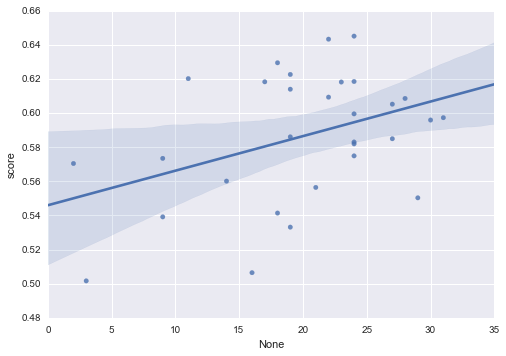

In [19]:
sns.regplot(ten_percent,ten_percent_r.score)

In [20]:
ten_percent_r

,score,num_features
region,,
0,0.629559,40.5
1,0.608648,40.5
2,0.599611,40.5
3,0.614077,40.5
4,0.556470,40.5
5,0.585014,40.5
6,0.620279,40.5
7,0.506460,40.5
8,0.605306,40.5


In [56]:
np.array(ten_percent)

array([18, 28, 24, 19, 21, 27, 11, 16, 27, 22, 31, 17, 24, 22, 14, 29,  9,
       19, 18, 19, 24,  9, 24,  2, 30, 24, 23,  3, 19, 24])

In [54]:
ten_percent

region
0         18
1         28
2         24
3         19
4         21
5         27
6         11
7         16
8         27
9         22
10        31
11        17
12        24
13        22
14        14
15        29
16         9
17        19
18        18
19        19
20        24
21         9
22        24
23         2
24        30
25        24
26        23
27         3
28        19
29        24
dtype: int64

In [40]:
%Rpush results
results.to_csv("multivariate.csv", index=False)

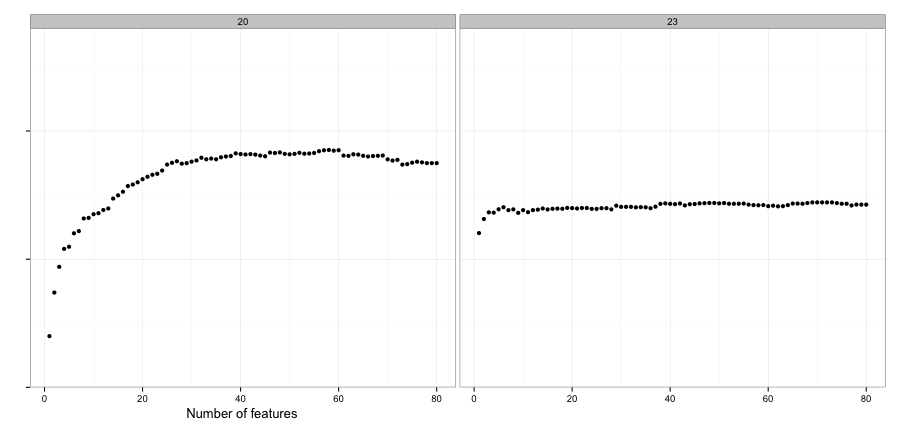

In [41]:
%%R -w 900 -h 425
ggplot(subset(results, region %in% c(20, 23)), aes(num_features, score)) + geom_point() +  facet_grid(.~region) + theme_bw() + xlab("Number of features") + ylab("Discriminability (Area under ROC)") + coord_cartesian(ylim=c(0.5, 0.64)) + ylab("") + theme(axis.text.y = element_blank(), axis.title.x = element_text(size = 13, hjust=.21, vjust=0))